In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import *
from IPython.display import Image
import matplotlib.ticker as mtick

import scipy.stats as stats
import statsmodels.stats.weightstats as wstats
from collections import OrderedDict

 A: installs = 2501 	 connected = 1104 	 prop = 0.4414234306277489
 B: installs = 2141 	 connected = 1076 	 prop = 0.5025688930406352


Text(0.5, 1.0, 'Is this statistically significant?')

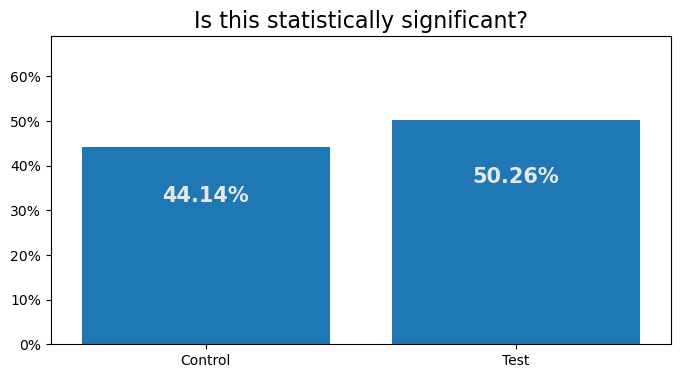

In [2]:
# Generating fake data
# installs: how many installs Facebook app
# connects: how many connects to the app

control_installs = 2501
control_connected = 1104
test_installs = 2141
test_connected = 1076

print(' {}: installs = {} \t connected = {} \t prop = {}'
      .format('A', control_installs, control_connected, control_connected/control_installs))

print(' {}: installs = {} \t connected = {} \t prop = {}'
      .format('B', test_installs, test_connected, test_connected/test_installs))


fig, ax = plt.subplots(figsize=(8,4))

x = [0,1]
y = [control_connected/control_installs, test_connected/test_installs]
ax.bar(x, y, align='center', width=.8)
ax.set_xticks(x)
ax.set_xticklabels(['Control', 'Test'])
xlim(-.5,1.5)
ylim(0, .69)
for xx, yy in zip(x,y):
    ax.text(xx, yy*.7, '%0.2f%%'%(100*yy),ha='center', va='bottom', fontdict={'size':15,'weight':'bold','color':(0.9,.9,.9)})
# ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f%%'))
# def perc(x, pos=0):
#     return '%0.0f%%'%(100*x)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos=0: '%0.0f%%'%(100.0*x)))
title('Is this statistically significant?', fontdict={'size':16})


In [6]:
def ztest_two_samples(
        x1,
        n1, 
        x2, 
        n2,
        one_sided=False,
):
    p1 = x1/n1
    p2 = x2/n2
    
    p = (x1 + x2) / (n1 + n2)
    se = p * (1-p) * (1/n1 + 1/n2)
    se = sqrt(se)
    
    z = (p1 - p2) / se
    p = 1 - stats.norm.cdf(abs(z))
    p *= 2 - one_sided

    return z, p


z, p = ztest_two_samples(
    control_connected,
    control_installs,
    test_connected,
    test_installs,
    one_sided = False,
)

print(f'z={z}, p={p}')

z=-4.161114920415351, p=3.166976582869019e-05


In [8]:
from statsmodels.stats.proportion import proportions_ztest
count = np.array([control_connected, test_connected])
nobs = np.array([control_installs, test_installs])
z, p = proportions_ztest(count, nobs, value=0, alternative='two-sided')
print(f'z={z}, p={p}')




z=-4.161114920415351, p=3.1669765828788065e-05
